FFR 120  
Felix Waldschock

HW 2  
Exercise 7.2

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [150]:
# parameters
L = 100         # length of the box
sigma = 1       
dT = 0.01
dT = 1
x0 = 0

In [151]:
# update rule
def updatePos(x):
    o = np.random.randn()*np.sqrt(dT)
    x += o
    return x

Boundary conditions:    
if (x < (- L / 2)):  
    x = - L - x  
elif ((-L / 2) <= x <= (L / 2)):  
    x = x  
elif (x > (L / 2)):   
    x = L - x  


In [152]:
# check boundary conditions
def checkBoundary(x, L):
    Lh = L / 2
    if (x < -Lh):
        x = - L - x
    elif ((-Lh <= x) and (x <= Lh)):
        x = x
    elif (x > Lh):
        x = L - x
    return x
    

In [153]:
# Simulate
N = 10000                                   # number of trajectiories (particles)
T_tot = [10, 100, 1000, 10000]              # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 

trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
simgas_ = np.zeros(N)


0


In [154]:
# loop over all particles
for i in trange(N):
    # loop the iterion steps -> only loop over the longest time, and save the data from the intermediate steps
    max_steps = int(np.max(Iteration_Steps))
    # init particle
    x = x0
    for s in range(max_steps):
        # loop over all steps
        x = updatePos(x)
        x = checkBoundary(x, L)
        
        # save the final x if s is in the Iteration_Steps
        if s in Iteration_Steps:
            # find at which index s is in Iteration_Steps
            index = np.where(Iteration_Steps == s)[0][0]
            # save the x at the index
            trajectories[i, index] = x
        if s == max_steps-1:
            trajectories[i, -1] = x
    


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [06:09<00:00, 27.09it/s]


In [156]:
# save the trajectories to a file
if(0):
    np.savetxt('trajectories.npy', trajectories)


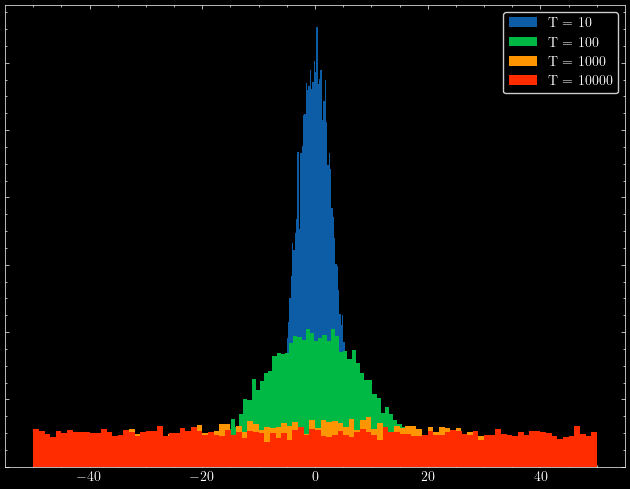

In [157]:
# load the trajectories from a file
trajectories = np.loadtxt('trajectories.npy')

# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=100, density=True, label='T = 10')
plt.hist(trajectories[:, 1], bins=100, density=True, label='T = 100')
plt.hist(trajectories[:, 2], bins=100, density=True, label='T = 1000')
plt.hist(trajectories[:, 3], bins=100, density=True, label='T = 10000')
# plt.hist(trajectories[:, 4], bins=100, density=True, label='T = 100000')
plt.legend()
ax.set_yticklabels([])
plt.show()


